In [220]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Data Cleansing

In [14]:
game_sales = pd.read_csv("video_games_sales.csv")
print(game_sales.describe())
print(game_sales.info())
print(game_sales.head())
game_sales.dtypes
game_sales.isnull().sum()
# Checking the overall structure of my data

               rank          year      na_sales      eu_sales      jp_sales  \
count  16598.000000  16327.000000  16598.000000  16598.000000  16598.000000   
mean    8300.605254   2006.406443      0.264667      0.146652      0.077782   
std     4791.853933      5.828981      0.816683      0.505351      0.309291   
min        1.000000   1980.000000      0.000000      0.000000      0.000000   
25%     4151.250000   2003.000000      0.000000      0.000000      0.000000   
50%     8300.500000   2007.000000      0.080000      0.020000      0.000000   
75%    12449.750000   2010.000000      0.240000      0.110000      0.040000   
max    16600.000000   2020.000000     41.490000     29.020000     10.220000   

        other_sales  global_sales  
count  16598.000000  16598.000000  
mean       0.048063      0.537441  
std        0.188588      1.555028  
min        0.000000      0.010000  
25%        0.000000      0.060000  
50%        0.010000      0.170000  
75%        0.040000      0.470000  


rank              0
name              0
platform          0
year            271
genre             0
publisher        58
na_sales          0
eu_sales          0
jp_sales          0
other_sales       0
global_sales      0
dtype: int64

In [11]:
print(game_sales['year'].min())
print(game_sales['year'].max())
# I wanted to see the range of dates covered in the data

1980.0
2020.0


In [242]:
game_sales_newgen = game_sales[(game_sales['year']>=2000)]
game_sales_oldtonew = game_sales[(game_sales['year']<2020)]
print(game_sales_newgen.describe())
print(game_sales_newgen.head())
print(game_sales_newgen['year'].min())
print(game_sales_newgen['year'].max())
# Filtering the dates to only show sales from the year 2000 and beyond
# I added an oldtonew dataframe to have a larger sample size for a later statistical analysis

               rank          year      na_sales      eu_sales      jp_sales  \
count  14353.000000  14353.000000  14353.000000  14353.000000  14353.000000   
mean    8537.008012   2007.944054      0.245361      0.145966      0.056398   
std     4787.545431      4.049582      0.716572      0.515532      0.249819   
min        1.000000   2000.000000      0.000000      0.000000      0.000000   
25%     4405.000000   2005.000000      0.000000      0.000000      0.000000   
50%     8631.000000   2008.000000      0.080000      0.020000      0.000000   
75%    12710.000000   2011.000000      0.230000      0.110000      0.030000   
max    16600.000000   2020.000000     41.490000     29.020000      6.500000   

        other_sales  global_sales  
count  14353.000000  14353.000000  
mean       0.051171      0.499190  
std        0.200431      1.471345  
min        0.000000      0.010000  
25%        0.000000      0.060000  
50%        0.010000      0.160000  
75%        0.040000      0.450000  


In [26]:
newgen_genre = game_sales_newgen[['year', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'global_sales']]
newgen_platform = game_sales_newgen[['platform', 'year', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'global_sales' ]]
newgen_publisher = game_sales_newgen[['year', 'publisher', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'global_sales']]
# This helps me filter out some datasets to better get a sense of the data

In [286]:
newgen_nasum = game_sales_newgen.groupby(['year', 'platform', 'genre'])['na_sales'].sum()
newgen_nasum_reset = newgen_nasum.reset_index()
newgen_sorted = newgen_nasum_reset.sort_values(['na_sales', 'platform'], ascending=False)
print(newgen_sorted.head(15))

oldtonew_nasum = game_sales_oldtonew.groupby(['year', 'platform', 'genre'])['na_sales'].sum()
oldtonew_nasum_reset = oldtonew_nasum.reset_index()
print(newgen_nasum_reset)
print(oldtonew_nasum_reset)
# I wanted to make a dataset of the total North American sales by year and platform to see the general trends

        year platform    genre  na_sales
761   2009.0      Wii   Sports     45.42
499   2006.0      Wii   Sports     42.60
941   2011.0     X360  Shooter     27.59
848   2010.0     X360  Shooter     26.43
681   2008.0     X360   Action     25.71
832   2010.0      Wii     Misc     25.26
374   2005.0      PS2   Action     23.00
1025  2012.0     X360  Shooter     22.56
176   2002.0      PS2   Action     22.40
309   2004.0      PS2   Sports     22.38
604   2007.0     X360  Shooter     21.71
771   2009.0     X360  Shooter     21.67
727   2009.0      PS3   Action     21.03
186   2002.0      PS2   Sports     20.75
844   2010.0     X360     Misc     20.72
        year platform         genre  na_sales
0     2000.0       DC        Action      0.41
1     2000.0       DC     Adventure      0.00
2     2000.0       DC      Fighting      0.00
3     2000.0       DC        Racing      1.10
4     2000.0       DC  Role-Playing      0.00
...      ...      ...           ...       ...
1353  2016.0     XOne 

In [281]:
# Now I want to separate by the main home gaming systems, including the PC, found in North America from 2000-2010
newgen_nintendo = newgen_nasum_reset[newgen_nasum_reset['platform'].isin(["N64", "GB", "GBA", "GC", "DS", "3DS", "Wii", "WiiU"])]
newgen_microsoft = newgen_nasum_reset[newgen_nasum_reset['platform'].isin(["XOne", "XB", "X360"])]
newgen_sony = newgen_nasum_reset[newgen_nasum_reset['platform'].isin(["PS", "PS2", "PS3", "PS4", "PSP", "PSV"])]
newgen_PC = newgen_nasum_reset[newgen_nasum_reset['platform'].isin(["PC"])]

oldtonew_nintendo = oldtonew_nasum_reset[oldtonew_nasum_reset['platform'].isin(["SNES","NES","N64", "GB", "GBA", "GC", "DS", "3DS", "Wii", "WiiU"])]

print(newgen_nintendo.head())
print(newgen_microsoft.head())
print(newgen_sony.head())
print(newgen_PC.head())
print(oldtonew_nintendo.head())

      year platform      genre  na_sales
7   2000.0       GB     Action      0.00
8   2000.0       GB  Adventure      0.00
9   2000.0       GB       Misc      0.00
10  2000.0       GB   Platform      2.15
11  2000.0       GB     Puzzle      0.29
       year platform     genre  na_sales
57   2000.0       XB    Sports      0.74
128  2001.0       XB    Action      0.96
129  2001.0       XB  Fighting      1.19
130  2001.0       XB      Misc      1.12
131  2001.0       XB  Platform      0.79
      year platform      genre  na_sales
31  2000.0       PS     Action     10.12
32  2000.0       PS  Adventure      1.01
33  2000.0       PS   Fighting      5.08
34  2000.0       PS       Misc      4.54
35  2000.0       PS   Platform      3.61
      year platform         genre  na_sales
27  2000.0       PC          Misc      1.67
28  2000.0       PC  Role-Playing      0.01
29  2000.0       PC    Simulation      0.01
30  2000.0       PC      Strategy      1.34
97  2001.0       PC        Action      0.0

# Insights

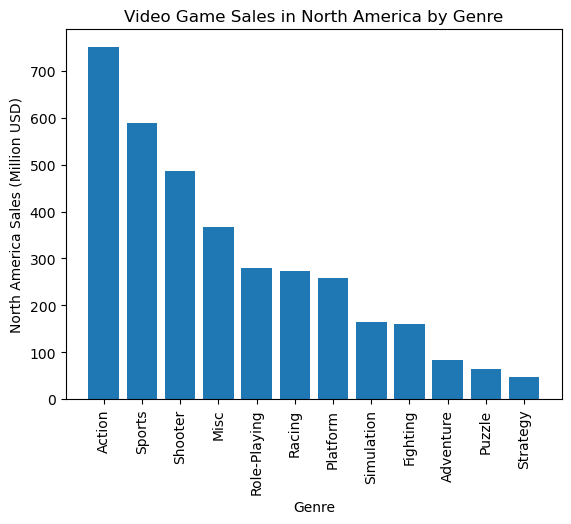

In [289]:
fig, ax = plt.subplots()
newgen_genre_agg = newgen_sorted.groupby('genre')['na_sales'].sum()
newgen_genre_reset = newgen_genre_agg.reset_index()
newgen_genre_sorted = newgen_genre_reset.sort_values('na_sales', ascending=False)
plt.bar(newgen_genre_sorted['genre'], newgen_genre_sorted['na_sales'])
plt.xticks(newgen_genre_sorted['genre'], rotation=90)
plt.ylabel('North America Sales (Million USD)')
plt.xlabel('Genre')
plt.title('Video Game Sales in North America by Genre')
plt.show()
# We can see that the Action genre had by far the strongest sales numbers in North America
# Sports, Shooters, and Misc. games have also had great numbers so far from 2000-2020

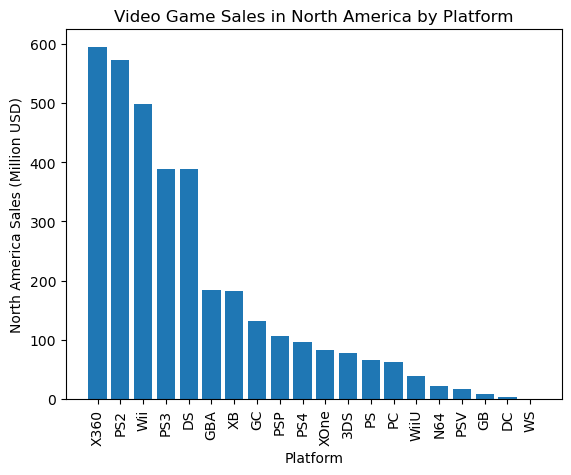

In [288]:
fig, ax = plt.subplots()
newgen_plat_agg = newgen_sorted.groupby('platform')['na_sales'].sum()
newgen_plat_reset = newgen_plat_agg.reset_index()
newgen_plat_sorted = newgen_plat_reset.sort_values('na_sales', ascending=False)
plt.bar(newgen_plat_sorted['platform'], newgen_plat_sorted['na_sales'])
plt.xticks(newgen_plat_sorted['platform'], rotation=90)
plt.ylabel('North America Sales (Million USD)')
plt.xlabel('Platform')
plt.title('Video Game Sales in North America by Platform')
plt.show()

# It seems the XBox 360 had the most sales the past two decades, followed by the PS2 and the Wii.

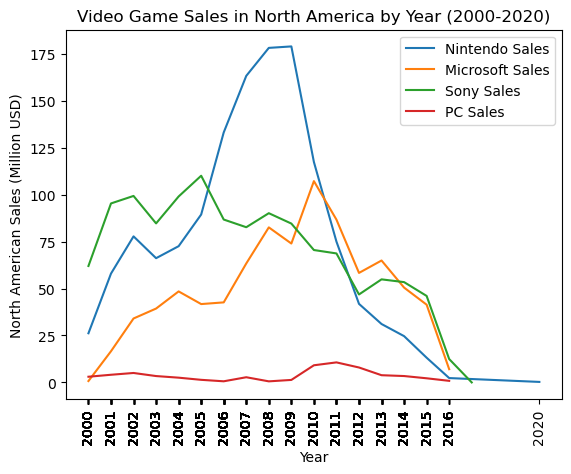

In [178]:
fig, ax = plt.subplots()
newgen_nintendo_group = newgen_nintendo.groupby("year")["na_sales"].sum()
newgen_nintendo_group.plot(x='year', y='na_sales', kind='line', label='Nintendo Sales')

newgen_microsoft_group = newgen_microsoft.groupby("year")["na_sales"].sum()
newgen_microsoft_group.plot(x='year', y='na_sales', kind='line', label='Microsoft Sales')

newgen_sony_group = newgen_sony.groupby("year")["na_sales"].sum()
newgen_sony_group.plot(x='year', y='na_sales', kind='line', label='Sony Sales')

newgen_PC_group = newgen_PC.groupby("year")["na_sales"].sum()
newgen_PC_group.plot(x='year', y='na_sales', kind='line', label='PC Sales')

plt.xticks(newgen_nintendo['year'], rotation=90)
plt.legend()
plt.ylabel('North American Sales (Million USD)')
plt.xlabel('Year')
plt.title('Video Game Sales in North America by Year (2000-2020)')
plt.show()

# Aggregated all the different systems into their umbrella companies to see overall sales trends by major company
# Nintendo has the best historic sales from 2005-2011
# Nevertheless, it seems that with the advent of next generation consoles in 2010, Microsoft and Sony have steadily
# overtaken Nintendo in sales over the past decade
# PC sales have not been as large when compared to the home consoles


# Nintendo Console Sales

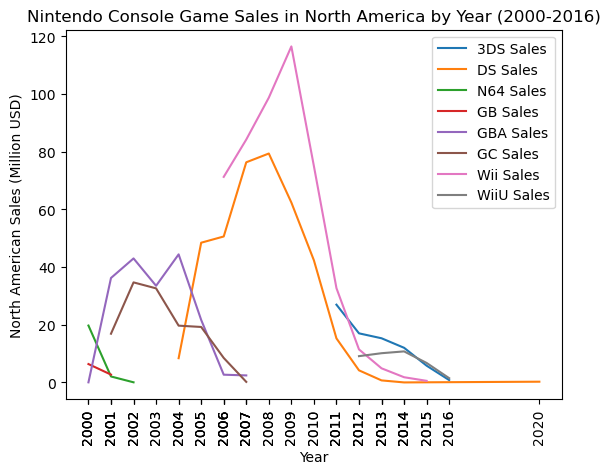

In [212]:
nintendo_system_sales = newgen_nintendo.groupby(["platform", "year"])["na_sales"].sum()
nintendo_consoles = nintendo_system_sales.reset_index()

ds3_sales = nintendo_consoles[nintendo_consoles['platform'].isin(['3DS'])]
ds3_group = ds3_sales.groupby("year")["na_sales"].sum()

ds_sales = nintendo_consoles[nintendo_consoles['platform'].isin(['DS'])]
ds_group = ds_sales.groupby("year")["na_sales"].sum()

n64_sales = nintendo_consoles[nintendo_consoles['platform'].isin(['N64'])]
n64_group = n64_sales.groupby("year")["na_sales"].sum()

gb_sales = nintendo_consoles[nintendo_consoles['platform'].isin(['GB'])]
gb_group = gb_sales.groupby("year")["na_sales"].sum()

gba_sales = nintendo_consoles[nintendo_consoles['platform'].isin(['GBA'])]
gba_group = gba_sales.groupby("year")["na_sales"].sum()

gc_sales = nintendo_consoles[nintendo_consoles['platform'].isin(['GC'])]
gc_group = gc_sales.groupby("year")["na_sales"].sum()

wii_sales = nintendo_consoles[nintendo_consoles['platform'].isin(['Wii'])]
wii_group = wii_sales.groupby("year")["na_sales"].sum()

wiiu_sales = nintendo_consoles[nintendo_consoles['platform'].isin(['WiiU'])]
wiiu_group = wiiu_sales.groupby("year")["na_sales"].sum()

ds3_group.plot(x='year', y='na_sales', kind='line', label='3DS Sales')
ds_group.plot(x='year', y='na_sales', kind='line', label='DS Sales')
n64_group.plot(x='year', y='na_sales', kind='line', label='N64 Sales')
gb_group.plot(x='year', y='na_sales', kind='line', label='GB Sales')
gba_group.plot(x='year', y='na_sales', kind='line', label='GBA Sales')
gc_group.plot(x='year', y='na_sales', kind='line', label='GC Sales')
wii_group.plot(x='year', y='na_sales', kind='line', label='Wii Sales')
wiiu_group.plot(x='year', y='na_sales', kind='line', label='WiiU Sales')
plt.legend()
plt.xticks(nintendo_consoles['year'], rotation=90)
plt.ylabel('North American Sales (Million USD)')
plt.xlabel('Year')
plt.title('Nintendo Console Game Sales in North America by Year (2000-2016)')
plt.show()

# The Wii and DS were by far Nintendo's most successful systems in terms of overall sales in North America from 2004-2012

# Microsoft Console Sales

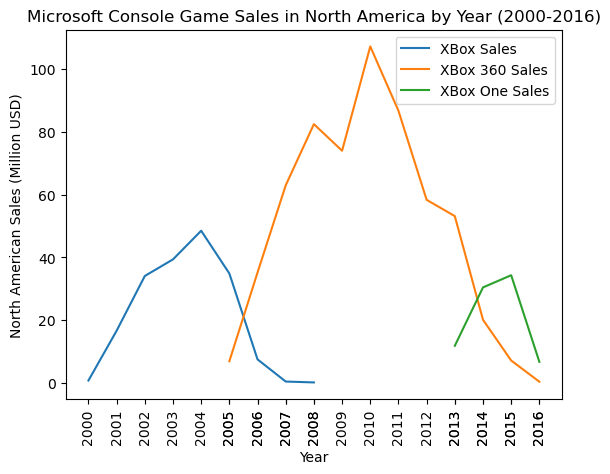

In [213]:
microsoft_system_sales = newgen_microsoft.groupby(["platform", "year"])["na_sales"].sum()
microsoft_consoles = microsoft_system_sales.reset_index()

xb_sales = microsoft_consoles[microsoft_consoles['platform'].isin(['XB'])]
xb_group = xb_sales.groupby("year")["na_sales"].sum()

x360_sales = microsoft_consoles[microsoft_consoles['platform'].isin(['X360'])]
x360_group = x360_sales.groupby("year")["na_sales"].sum()

xone_sales = microsoft_consoles[microsoft_consoles['platform'].isin(['XOne'])]
xone_group = xone_sales.groupby("year")["na_sales"].sum()

xb_group.plot(x='year', y='na_sales', kind='line', label='XBox Sales')
x360_group.plot(x='year', y='na_sales', kind='line', label='XBox 360 Sales')
xone_group.plot(x='year', y='na_sales', kind='line', label='XBox One Sales')
plt.legend()
plt.xticks(microsoft_consoles['year'], rotation=90)
plt.ylabel('North American Sales (Million USD)')
plt.xlabel('Year')
plt.title('Microsoft Console Game Sales in North America by Year (2000-2016)')
plt.show()

# We can see that the XBox 360 had the best sales numbers for Microsoft from 2006-2014

# Sony Console Sales

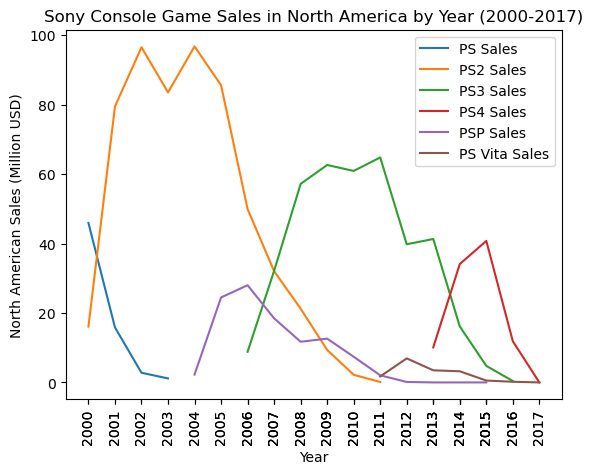

In [214]:
sony_system_sales = newgen_sony.groupby(["platform", "year"])["na_sales"].sum()
sony_consoles = sony_system_sales.reset_index()

ps_sales = sony_consoles[sony_consoles['platform'].isin(['PS'])]
ps_group = ps_sales.groupby("year")["na_sales"].sum()

ps2_sales = sony_consoles[sony_consoles['platform'].isin(['PS2'])]
ps2_group = ps2_sales.groupby("year")["na_sales"].sum()

ps3_sales = sony_consoles[sony_consoles['platform'].isin(['PS3'])]
ps3_group = ps3_sales.groupby("year")["na_sales"].sum()

ps4_sales = sony_consoles[sony_consoles['platform'].isin(['PS4'])]
ps4_group = ps4_sales.groupby("year")["na_sales"].sum()

psp_sales = sony_consoles[sony_consoles['platform'].isin(['PSP'])]
psp_group = psp_sales.groupby("year")["na_sales"].sum()

psv_sales = sony_consoles[sony_consoles['platform'].isin(['PSV'])]
psv_group = psv_sales.groupby("year")["na_sales"].sum()

ps_group.plot(x='year', y='na_sales', kind='line', label='PS Sales')
ps2_group.plot(x='year', y='na_sales', kind='line', label='PS2 Sales')
ps3_group.plot(x='year', y='na_sales', kind='line', label='PS3 Sales')
ps4_group.plot(x='year', y='na_sales', kind='line', label='PS4 Sales')
psp_group.plot(x='year', y='na_sales', kind='line', label='PSP Sales')
psv_group.plot(x='year', y='na_sales', kind='line', label='PS Vita Sales')

plt.legend()
plt.xticks(sony_consoles['year'], rotation=90)
plt.ylabel('North American Sales (Million USD)')
plt.xlabel('Year')
plt.title('Sony Console Game Sales in North America by Year (2000-2017)')
plt.show()

# The PS2, followed by the PS3, were Sony's most successful consoles to date (2001-2007 & 2007-2014 respectively)

# Sales by Genre for Nintendo

          genre    year  na_sales
177      Sports  2009.0     47.87
174      Sports  2006.0     45.24
58         Misc  2007.0     32.33
7        Action  2007.0     31.19
61         Misc  2010.0     31.17
59         Misc  2008.0     30.64
9        Action  2009.0     28.03
60         Misc  2009.0     27.18
158  Simulation  2008.0     25.44
176      Sports  2008.0     24.96
175      Sports  2007.0     23.18
157  Simulation  2007.0     22.95
8        Action  2008.0     21.53
109      Racing  2008.0     20.76
57         Misc  2006.0     19.31
62         Misc  2011.0     18.65
74     Platform  2006.0     18.51
11       Action  2011.0     18.51
70     Platform  2002.0     18.22
10       Action  2010.0     17.93


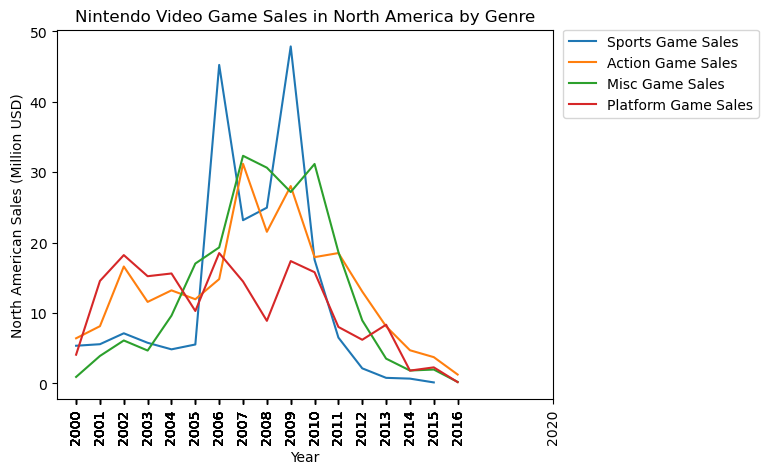

In [208]:
nintendo_genre_sales = newgen_nintendo.groupby(["genre", "year"])["na_sales"].sum()
nintendo_genre = nintendo_genre_sales.reset_index()
nintendo_genre_sorted = nintendo_genre.sort_values(["na_sales", "genre"], ascending=False)
nintendo_genre_top20 = nintendo_genre_sorted.iloc[:20]
print(nintendo_genre_top20)
# Wanted to see the top 20 overall sales genres and their corresponding years

nintendo_sports = nintendo_genre[nintendo_genre['genre'].isin(["Sports"])]
nintendo_sports_group = nintendo_sports.groupby("year")["na_sales"].sum()

nintendo_action = nintendo_genre[nintendo_genre['genre'].isin(["Action"])]
nintendo_action_group = nintendo_action.groupby("year")["na_sales"].sum()

nintendo_misc = nintendo_genre[nintendo_genre['genre'].isin(["Misc"])]
nintendo_misc_group = nintendo_misc.groupby("year")["na_sales"].sum()

nintendo_platform = nintendo_genre[nintendo_genre['genre'].isin(["Platform"])]
nintendo_platform_group = nintendo_platform.groupby("year")["na_sales"].sum()

nintendo_simulation = nintendo_genre[nintendo_genre['genre'].isin(["Simulation"])]
nintendo_racing = nintendo_genre[nintendo_genre['genre'].isin(["Racing"])]
nintendo_action = nintendo_genre[nintendo_genre['genre'].isin(["Action"])]



nintendo_sports_group.plot(x='year', y='na_sales', kind='line', label="Sports Game Sales")
nintendo_action_group.plot(x='year', y='na_sales', kind='line', label="Action Game Sales")
nintendo_misc_group.plot(x='year', y='na_sales', kind='line', label="Misc Game Sales")
nintendo_platform_group.plot(x='year', y='na_sales', kind='line', label="Platform Game Sales")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xticks(nintendo_genre['year'], rotation=90)
plt.ylabel('North American Sales (Million USD)')
plt.xlabel('Year')
plt.title('Nintendo Video Game Sales in North America by Genre')
plt.show()

### We can see in the graph above that the majority of sales for Nintendo were driven by Sports, Action, and Misc. games. Furthermore, the large spikes in the Sports game sales in 2006 and 2009 correspond with a boom in sales for the Wii system.

# Sales by Genre for Microsoft

       genre    year  na_sales
124  Shooter  2011.0     27.59
123  Shooter  2010.0     26.43
7     Action  2008.0     25.71
12    Action  2013.0     24.39
125  Shooter  2012.0     22.56
120  Shooter  2007.0     21.71
122  Shooter  2009.0     21.67
56      Misc  2010.0     20.72
9     Action  2010.0     20.57
127  Shooter  2014.0     18.48
121  Shooter  2008.0     18.36
11    Action  2012.0     18.22
156   Sports  2010.0     17.52
8     Action  2009.0     17.11
126  Shooter  2013.0     16.73
10    Action  2011.0     16.04
128  Shooter  2015.0     15.97
13    Action  2014.0     14.36
117  Shooter  2004.0     14.34
118  Shooter  2005.0     12.37


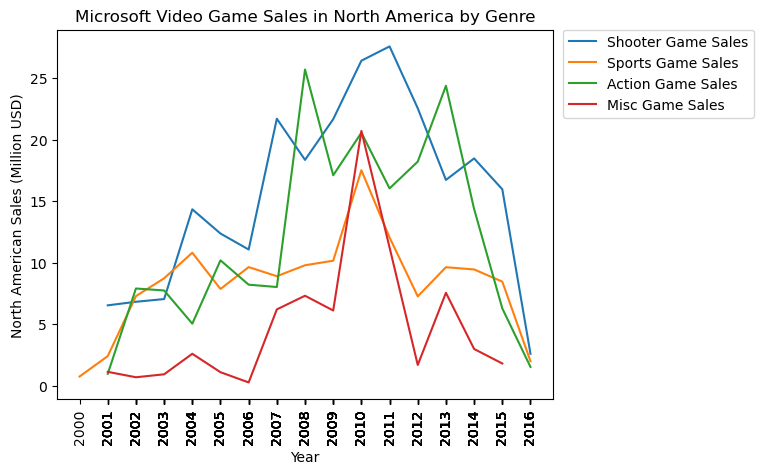

In [207]:
microsoft_genre_sales = newgen_microsoft.groupby(["genre", "year"])["na_sales"].sum()
microsoft_genre = microsoft_genre_sales.reset_index()
microsoft_genre_sorted = microsoft_genre.sort_values(["na_sales", "genre"], ascending=False)
microsoft_genre_top20 = microsoft_genre_sorted.iloc[:20]
print(microsoft_genre_top20)
# Wanted to see the top 20 overall sales genres and their corresponding years

microsoft_shooter = microsoft_genre[microsoft_genre['genre'].isin(["Shooter"])]
microsoft_shooter_group = microsoft_shooter.groupby("year")["na_sales"].sum()

microsoft_sports = microsoft_genre[microsoft_genre['genre'].isin(["Sports"])]
microsoft_sports_group = microsoft_sports.groupby("year")["na_sales"].sum()

microsoft_action = microsoft_genre[microsoft_genre['genre'].isin(["Action"])]
microsoft_action_group = microsoft_action.groupby("year")["na_sales"].sum()

microsoft_misc = microsoft_genre[microsoft_genre['genre'].isin(["Misc"])]
microsoft_misc_group = microsoft_misc.groupby("year")["na_sales"].sum()

microsoft_shooter_group.plot(x='year', y='na_sales', kind='line', label="Shooter Game Sales")
microsoft_sports_group.plot(x='year', y='na_sales', kind='line', label="Sports Game Sales")
microsoft_action_group.plot(x='year', y='na_sales', kind='line', label="Action Game Sales")
microsoft_misc_group.plot(x='year', y='na_sales', kind='line', label="Misc Game Sales")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xticks(microsoft_genre['year'], rotation=90)
plt.ylabel('North American Sales (Million USD)')
plt.xlabel('Year')
plt.title('Microsoft Video Game Sales in North America by Genre')
plt.show()

### Shooting and Action games seem to be the major sellers for Microsoft home consoles. The spikes in 2008 for action games and 2011 for shooting games correspond with major spikes in XBox 360 game sales.

# Sales by Genre for Sony

       genre    year  na_sales
5     Action  2005.0     27.47
9     Action  2009.0     26.39
8     Action  2008.0     25.06
2     Action  2002.0     23.31
173   Sports  2004.0     22.88
174   Sports  2005.0     22.68
101   Racing  2001.0     21.07
10    Action  2010.0     21.07
170   Sports  2001.0     20.84
4     Action  2004.0     20.83
171   Sports  2002.0     20.78
1     Action  2001.0     20.72
13    Action  2013.0     20.71
7     Action  2007.0     19.67
12    Action  2012.0     19.24
14    Action  2014.0     19.04
3     Action  2003.0     18.43
175   Sports  2006.0     18.03
146  Shooter  2011.0     17.42
11    Action  2011.0     17.32


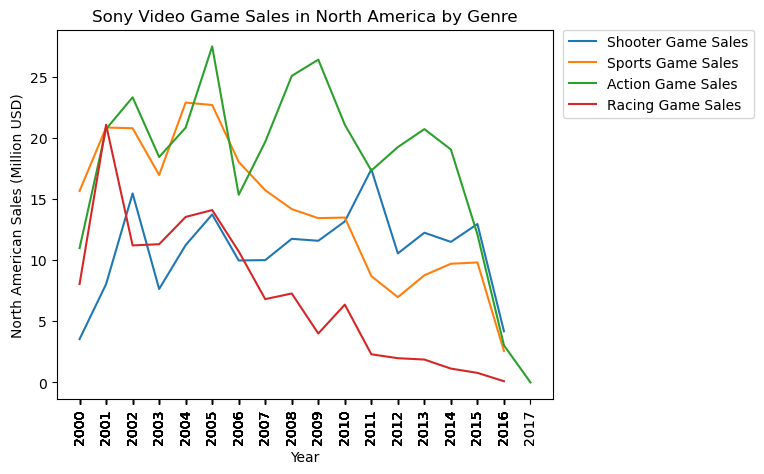

In [211]:
sony_genre_sales = newgen_sony.groupby(["genre", "year"])["na_sales"].sum()
sony_genre = sony_genre_sales.reset_index()
sony_genre_sorted = sony_genre.sort_values(["na_sales", "genre"], ascending=False)
sony_genre_top20 = sony_genre_sorted.iloc[:20]
print(sony_genre_top20)
# Wanted to see the top 20 overall sales genres and their corresponding years

sony_shooter = sony_genre[sony_genre['genre'].isin(["Shooter"])]
sony_shooter_group = sony_shooter.groupby("year")["na_sales"].sum()

sony_sports = sony_genre[sony_genre['genre'].isin(["Sports"])]
sony_sports_group = sony_sports.groupby("year")["na_sales"].sum()

sony_action = sony_genre[sony_genre['genre'].isin(["Action"])]
sony_action_group = sony_action.groupby("year")["na_sales"].sum()

sony_racing = sony_genre[sony_genre['genre'].isin(["Racing"])]
sony_racing_group = sony_racing.groupby("year")["na_sales"].sum()

sony_shooter_group.plot(x='year', y='na_sales', kind='line', label="Shooter Game Sales")
sony_sports_group.plot(x='year', y='na_sales', kind='line', label="Sports Game Sales")
sony_action_group.plot(x='year', y='na_sales', kind='line', label="Action Game Sales")
sony_racing_group.plot(x='year', y='na_sales', kind='line', label="Racing Game Sales")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xticks(sony_genre['year'], rotation=90)
plt.ylabel('North American Sales (Million USD)')
plt.xlabel('Year')
plt.title('Sony Video Game Sales in North America by Genre')
plt.show()

### Sony sales seem to be dominated by Action and Sports games, with Shooters gaining popularity from 2010 onward. The peaks of action game sales in 2005 and 2009 correspond with peak game sales in the PS2 and PS3 consoles, respectively. The peak of shooter game sales in 2011, along a high level of action game sales in the same year, seems to correspond with a peak in PS3 sales of that same year.

In [270]:
from scipy import stats

oldtonew_nintendo_group = oldtonew_nintendo.groupby("year")["na_sales"].sum()
nintendo_genre_old = oldtonew_nintendo.groupby(["genre", "year"])["na_sales"].sum()
oldtonew_nintendo_genre = nintendo_genre_old.reset_index()

oldtonew_nintendo_sports = oldtonew_nintendo_genre[oldtonew_nintendo_genre['genre'].isin(["Sports"])]
total_nintendo_sports_group = oldtonew_nintendo_sports.groupby("year")["na_sales"].sum()

oldtonew_nintendo_action = oldtonew_nintendo_genre[oldtonew_nintendo_genre['genre'].isin(["Action"])]
total_nintendo_action_group = oldtonew_nintendo_action.groupby("year")["na_sales"].sum()

oldtonew_nintendo_misc = oldtonew_nintendo_genre[oldtonew_nintendo_genre['genre'].isin(["Misc"])]
total_nintendo_misc_group = oldtonew_nintendo_misc.groupby("year")["na_sales"].sum()

oldtonew_nintendo_platform = oldtonew_nintendo_genre[oldtonew_nintendo_genre['genre'].isin(["Platform"])]
total_nintendo_platform_group = oldtonew_nintendo_platform.groupby("year")["na_sales"].sum()

oldtonew_nintendo_clean = oldtonew_nintendo_group[oldtonew_nintendo_group.index<=2015]
oldtonew_nintendo_clean2 = oldtonew_nintendo_group[oldtonew_nintendo_group.index<=2016]
oldtonew_nintendo_clean3 = oldtonew_nintendo_group[(oldtonew_nintendo_group.index>=1984) & (oldtonew_nintendo_group.index!=1987) & (oldtonew_nintendo_group.index<=2016)]
# Cleaned the total Nintendo sales grouped dataframe to have the same amount of data as the diff genre dataframes

print(oldtonew_nintendo_clean.count())
print(oldtonew_nintendo_clean2.count())
print(oldtonew_nintendo_clean3.count())
print(total_nintendo_sports_group.count())
print(total_nintendo_action_group.count())
print(total_nintendo_platform_group.count())

# Calculated Pearsons r coefficient to determine correlation
corr, _ = pearsonr(oldtonew_nintendo_clean, total_nintendo_sports_group)
print('Pearsons correlation for Sports genre and total Nintendo Sales (1983-2015): %.3f' % corr)

corr2, _ = pearsonr(oldtonew_nintendo_clean3, total_nintendo_action_group)
print('Pearsons correlation for Action genre and total Nintendo Sales (1984-2016): %.3f' % corr2)

corr3, _ = pearsonr(oldtonew_nintendo_clean2, total_nintendo_platform_group)
print('Pearsons correlation for Platform genre and total Nintendo Sales (1983-2016): %.3f' % corr3)

33
34
32
33
32
34
Pearsons correlation for Sports genre and total Nintendo Sales: 0.867
Pearsons correlation for Action genre and total Nintendo Sales: 0.907
Pearsons correlation for Platform genre and total Nintendo Sales: 0.496


### Although the sample sizes are in the low 30s, I wanted to perform a Pearson's correlation analysis to determine the relationship between total North American Nintendo sales (from the 1980s to modern times) and the 3 most popular genres: Sports, Action, and Platform games. I excluded the Misc. genre as there are too many gaps in the data for this genre.
### The strongest positive correlation is between Action games and sales with an r-value of 0.907.
### This is followed a strong positive correlation between Sports games and sales with an r-vale of 0.867.